# Imports

In [1]:
from numpy.random import seed
seed(888)
from tensorflow import set_random_seed
set_random_seed(404)

In [82]:
import os
import numpy as np
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import itertools

from keras.datasets import cifar10
from IPython.display import display
from keras.preprocessing.image import array_to_img
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import TensorBoard
from time import strftime
from sklearn.metrics import confusion_matrix

%matplotlib inline

# Constants

In [74]:
LOG_DIR = 'tensorboard_cifar_logs/'

LABEL_NAMES = ['Plane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog',  'Horse', 'Ship', 'Truck']
IMAGE_WIDTH = 32
IMAGE_HEIGHT = 32
IMAGE_PIXELS = IMAGE_WIDTH * IMAGE_HEIGHT
COLOR_CHANNEL = 3
TOTAL_INPUTS = IMAGE_PIXELS * COLOR_CHANNEL

NR_CLASSES = 10
VALIDATION_SIZE= 10000
SMALL_TRAIN_SIZE = 1000


# Get the Data

In [4]:
(x_train_all, y_train_all),(x_test, y_test) = cifar10.load_data()

In [5]:
type(cifar10)

module

In [6]:
type(x_train_all)

numpy.ndarray

# Explore the Data

In [7]:
x_train_all[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

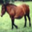

In [8]:
pic = array_to_img(x_train_all[7])
display(pic)

In [9]:
y_train_all.shape

(50000, 1)

In [10]:
LABEL_NAMES[y_train_all[7][0]]

'Horse'

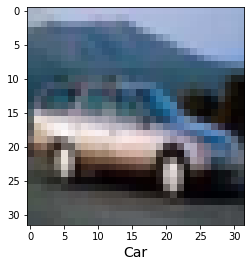

In [11]:
plt.imshow(x_train_all[4])
plt.xlabel(LABEL_NAMES[y_train_all[4][0]], fontsize = 14)
plt.show()

**For loop to ddisplay the first 10 images from the x_train_all array in a row. Show the name of the label
below the picture. Remove the ugly tick marks. Hint use matplotlib**

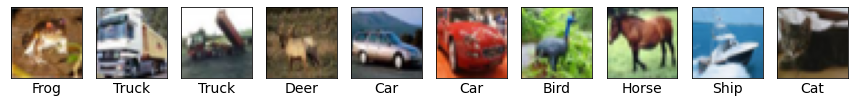

In [12]:
plt.figure(figsize = (15, 5))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.yticks([])
    plt.xticks([])
    plt.xlabel(LABEL_NAMES[y_train_all[i][0]], fontsize = 14)
    plt.imshow(x_train_all[i])

In [13]:
x_train_all[0].shape

(32, 32, 3)

In [14]:
x_train_all.shape

(50000, 32, 32, 3)

In [15]:
nr_images, x, y, c = x_train_all.shape
print(f'Images = {nr_images} \t | width = {x} \t | height = {y} \t channels = {c}')

Images = 50000 	 | width = 32 	 | height = 32 	 channels = 3


In [16]:
x_test.shape

(10000, 32, 32, 3)

In [17]:
y_test.shape

(10000, 1)

# Preprocess Data

In [18]:
type(x_train_all[0][0][0][0])

numpy.uint8

In [19]:
x_train_all, x_test = x_train_all/255.0, x_test /255.0

In [20]:
type(x_train_all[0][0][0][0])

numpy.float64

In [21]:
x_train_all[0][0][0][0]

0.23137254901960785

In [22]:
x_train_all = x_train_all.reshape(x_train_all.shape[0], TOTAL_INPUTS)

In [23]:
x_train_all.shape

(50000, 3072)

In [24]:
x_test = x_test.reshape(len(x_test), TOTAL_INPUTS)
print(f'Shape of x_test is {x_test.shape}')

Shape of x_test is (10000, 3072)


# Create Validation Dataset

In [25]:
x_val = x_train_all[:VALIDATION_SIZE]
y_val = y_train_all[:VALIDATION_SIZE]
x_val.shape

(10000, 3072)

**TODO:** Create two numpy arrays x_train and y_train that have the shape (40000, 3072) and (40000, 1) respectively
They need to contain the last 40000 values from x_train_all and y_train_all respectively

In [26]:
x_train = x_train_all[VALIDATION_SIZE:]
y_train = y_train_all[VALIDATION_SIZE:]
x_train.shape

(40000, 3072)

### Create a small dataset (for illustration)

In [27]:
x_train_xs = x_train_all[:SMALL_TRAIN_SIZE]
y_train_xs = y_train_all[:SMALL_TRAIN_SIZE]
x_train_xs.shape

(1000, 3072)

# Define the Neural Network using Keras

In [40]:
model_1 = Sequential([
    Dense(units = 128, input_dim = TOTAL_INPUTS, activation='relu', name = 'm1_hidden1'),
    Dense(units = 64, activation= 'relu', name = 'm1_hidden2'),
    Dense(units = 16, activation = 'relu', name = 'm2_hidden3'),
    Dense(units = 10, activation = 'softmax', name = 'm1_output')
])

model_1.compile(optimizer = 'adam', 
                loss = 'sparse_categorical_crossentropy', 
                metrics = ['accuracy'])

In [41]:
model_2 = Sequential()
model_2.add(Dropout(0.2, seed = 42, input_shape = (TOTAL_INPUTS,)))
model_2.add(Dense (128, activation = 'relu', name = 'm2.hidden1'))
model_2.add(Dense (64, activation = 'relu', name = 'm2.hidden2'))
model_2.add(Dense (16, activation = 'relu', name = 'm2.hidden3'))
model_2.add(Dense (10, activation = 'softmax', name = 'm2.output'))

model_2.compile(optimizer = 'adam', 
                loss = 'sparse_categorical_crossentropy', 
                metrics = ['accuracy'])

In [39]:
model_3 = Sequential()
model_3.add(Dropout(0.2, seed = 42, input_shape = (TOTAL_INPUTS,)))
model_3.add(Dense (128, activation = 'relu', name = 'm3.hidden1'))
model_3.add(Dropout(0.2, seed = 42))
model_3.add(Dense (64, activation = 'relu', name = 'm3.hidden2'))
model_3.add(Dense (16, activation = 'relu', name = 'm3.hidden3'))
model_3.add(Dense (10, activation = 'softmax', name = 'm3.output'))

model_3.compile(optimizer = 'adam', 
                loss = 'sparse_categorical_crossentropy', 
                metrics = ['accuracy'])

In [29]:
type(model_1)

keras.engine.sequential.Sequential

In [30]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
m1_hidden1 (Dense)           (None, 128)               393344    
_________________________________________________________________
m1_hidden2 (Dense)           (None, 64)                8256      
_________________________________________________________________
m2_hidden3 (Dense)           (None, 16)                1040      
_________________________________________________________________
m1_output (Dense)            (None, 10)                170       
Total params: 402,810
Trainable params: 402,810
Non-trainable params: 0
_________________________________________________________________


# Tensorboard (visualising learning)

In [31]:
def get_tensorboard(model_name):
    
    folder_name = f'{model_name} at {strftime("%H %M")}'
    dir_paths = os.path.join(LOG_DIR, folder_name)

    try:
        os.makedirs(dir_paths)
    except OSError as err:
        print(err.strerror)
    else:
        print('Successfully created directory')
    return TensorBoard(log_dir=dir_paths)

# Fit the Model

In [32]:
samples_per_batch = 1000

In [33]:
# %%time
# nr_epochs =150
# model_1.fit(x_train_xs,
#             y_train_xs,
#             batch_size=samples_per_batch, 
#             epochs=nr_epochs,
#             verbose=0,
#             validation_data= (x_val, y_val),
#             callbacks=[get_tensorboard('model_1')])

Successfully created directory




Wall time: 2min 44s


In [ ]:
# %%time
# nr_epochs =150
# model_2.fit(x_train_xs,
#             y_train_xs,
#             batch_size=samples_per_batch, 
#             epochs=nr_epochs,
#             verbose=0,
#             validation_data= (x_val, y_val),
            callbacks=[get_tensorboard('model_2')])

In [42]:
%%time
nr_epochs =100
model_1.fit(x_train,
            y_train,
            batch_size=samples_per_batch, 
            epochs=nr_epochs,
            verbose=0,
            validation_data= (x_val, y_val),
            callbacks=[get_tensorboard('model_1 XL')])

Successfully created directory
Wall time: 7min 30s


In [43]:
%%time
nr_epochs =100
model_2.fit(x_train,
            y_train,
            batch_size=samples_per_batch, 
            epochs=nr_epochs,
            verbose=0,
            validation_data= (x_val, y_val),
            callbacks=[get_tensorboard('model_2 XL')])

Successfully created directory
Wall time: 13min


In [44]:
%%time
nr_epochs =100
model_3.fit(x_train,
            y_train,
            batch_size=samples_per_batch, 
            epochs=nr_epochs,
            verbose=0,
            validation_data= (x_val, y_val),
            callbacks=[get_tensorboard('model_3 XL')])

Successfully created directory
Wall time: 12min 37s


# Prediction 

In [45]:
x_val[0].shape

(3072,)

In [48]:
test = np.expand_dims(x_val[0], axis = 0)
test.shape

(1, 3072)

In [51]:
np.set_printoptions(precision = 3)

In [50]:
model_2.predict(test)

array([[0.016, 0.002, 0.105, 0.134, 0.071, 0.115, 0.541, 0.014, 0.001,
        0.001]], dtype=float32)

In [52]:
model_2.predict(x_val)

array([[1.645e-02, 1.787e-03, 1.049e-01, ..., 1.419e-02, 1.170e-03,
        6.106e-04],
       [1.149e-02, 4.313e-01, 4.719e-04, ..., 2.957e-03, 5.675e-02,
        4.902e-01],
       [5.170e-02, 1.170e-02, 6.738e-03, ..., 1.487e-01, 4.522e-02,
        6.883e-01],
       ...,
       [1.795e-04, 5.228e-01, 1.805e-03, ..., 2.356e-03, 3.686e-02,
        3.886e-01],
       [2.274e-02, 4.998e-01, 7.345e-02, ..., 3.444e-03, 3.748e-03,
        2.913e-01],
       [1.958e-03, 7.998e-04, 3.901e-02, ..., 6.638e-01, 2.233e-04,
        1.940e-03]], dtype=float32)

In [53]:
model_2.predict(x_val).shape

(10000, 10)

In [55]:
model_2.predict_classes(test)

array([6], dtype=int64)

In [56]:
y_val[0]

array([6], dtype=uint8)

In [60]:
for number in range(10):
    test_img = np.expand_dims(x_val[number], axis = 0)
    predicted_val = model_2.predict_classes(test_img)[0]
    print(f'Actual value: {y_val[number][0]} vs predicted: {predicted_val}')

Actual value: 6 vs predicted: 6
Actual value: 9 vs predicted: 9
Actual value: 9 vs predicted: 9
Actual value: 4 vs predicted: 4
Actual value: 1 vs predicted: 1
Actual value: 1 vs predicted: 9
Actual value: 2 vs predicted: 2
Actual value: 7 vs predicted: 7
Actual value: 8 vs predicted: 8
Actual value: 3 vs predicted: 9


# Evaluation

In [61]:
model_2.metrics_names

['loss', 'accuracy']

In [63]:
test_loss , test_accuracy = model_2.evaluate(x_test, y_test)
print(f'Test loss is {test_loss:0.3} and test accuracy is {test_accuracy: 0.1%}')

10000/10000 [==============================] - 1s 68us/step
Test loss is 1.43 and test accuracy is  49.4%


## Confusion Matrix

In [65]:
predictions = model_2.predict_classes(x_test)
conf_matrix = confusion_matrix(y_true = y_test, y_pred = predictions)

In [66]:
conf_matrix.shape

(10, 10)

In [67]:
nr_rows = conf_matrix.shape[0]
nr_cols = conf_matrix.shape[1]

In [68]:
conf_matrix.max()

660

In [69]:
conf_matrix.min()

7

In [83]:
conf_matrix[0]

array([592,  49,  48,  10,  32,  17,  21,  30, 155,  46], dtype=int64)

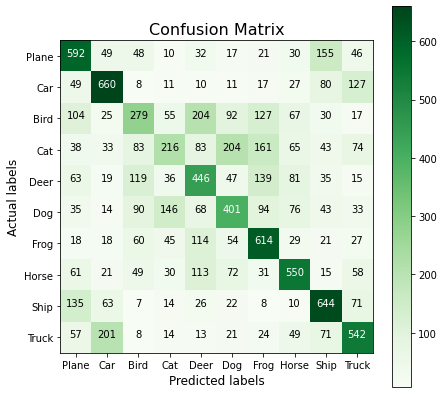

In [91]:
plt.figure(figsize = (7,7))
plt.imshow(conf_matrix, cmap = plt.cm.Greens)

plt.title('Confusion Matrix', fontsize = 16)
plt.ylabel('Actual labels', fontsize = 12)
plt.xlabel('Predicted labels', fontsize = 12)

tick_marks = np.arange(NR_CLASSES)
plt.yticks(tick_marks, LABEL_NAMES)
plt.xticks(tick_marks, LABEL_NAMES)

plt.colorbar()

for i, j in itertools.product(range(nr_rows), range(nr_cols)):
    plt.text(j, i, conf_matrix[i, j], horizontalalignment = 'center',
            color = 'white' if conf_matrix[i, j]> conf_matrix.max()/2 else 'black')
    

plt.show()

In [92]:
# True positives
np.diag(conf_matrix)

array([592, 660, 279, 216, 446, 401, 614, 550, 644, 542], dtype=int64)

In [93]:
recall = np.diag(conf_matrix)/ np.sum(conf_matrix, axis = 1)
recall

array([0.592, 0.66 , 0.279, 0.216, 0.446, 0.401, 0.614, 0.55 , 0.644,
       0.542])

In [94]:
precision = np.diag(conf_matrix)/ np.sum(conf_matrix, axis = 0)
precision

array([0.514, 0.598, 0.372, 0.374, 0.402, 0.426, 0.497, 0.559, 0.566,
       0.537])

In [95]:
avg_recall = np.mean(recall)
print(f'Model 2 recall score is {avg_recall: .2%}')

Model 2 recall score is  49.44%


In [98]:
avg_precision = np.mean(precision)
print(f'Model 2 precision score is {avg_precision: .2%}')

f1_score = 2* (avg_precision * avg_recall)/ (avg_precision + avg_recall)
print(f'Model 2 f score is  {f1_score:.2%}')

Model 2 precision score is  48.45%
Model 2 f score is  48.94%
